In [63]:
from thermo import *
from thermo.identifiers import ChemicalMetadataDB
from numpy.testing import assert_allclose
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.rdMolDescriptors import CalcMolFormula

a = ChemicalMetadataDB(elements=False, main_db=('done_MW_inchi5.txt'), user_dbs=[])

a

In [65]:
data = {}
with open('Original metadata.csv') as f:
    f.readline()
    for line in f.readlines():
        name, name2, CAS, formula, charge, MW = line.split('\t')
        data[CAS] = {'Name': name, 'Name2': name2, 'formula': formula, 'charge':int(charge), 'MW': float(MW)}

In [66]:
good_syns = {CAS:{'synonyms': [d['Name2']]} for CAS, d in data.items()}

for CAS, d in data.items():
    formula = d['formula'].split('+')[0]
    charge = d['charge']
    formulas = [formula+'+'*charge, formula+'+'+str(charge),
               formula+'('+'+'+ str(charge) + ')', formula+'('+ str(charge)+'+' + ')']
    good_syns[CAS]['synonyms'].extend(formulas)

    
good_syns['14464-47-2']['synonyms'].append('deuterium(1+)')

import json
f = open('Good synoynms by CAS.json', 'w')
json.dump(good_syns, f, indent=2, separators=(',', ': '), sort_keys=True)

In [67]:
# Only 25 synonyms to go through, plus to remove the dups in there - not bad.
from collections import Counter
ns = []
for i in a.CAS_index.values():
    ns.extend(list(set(i.all_names)))
#     assert len(i.all_names) == len(set(i.all_names))
# len(ns), len(set(ns))
Counter(ns).most_common(20)

[('CID3028194', 1),
 ('Hydroxylammonium', 1),
 ('Mn(II)', 1),
 ('STL483864', 1),
 ('propanaminium, N,N,N-tripropyl', 1),
 ('strontium(II) cation', 1),
 ('CHEBI:45825', 1),
 ('PLATINUM(2+)  TETRAAMMINE-  DICHLORIDE  (SP-4-1)-  REACTION PRODUCTS WITH AMMONIA',
  1),
 ('37466_RIEDEL', 1),
 ('Samarium ion(2+)', 1),
 ('Dy+3', 1),
 ('DTXSID30169912', 1),
 ('ZrO++', 1),
 ('Carbolith Capsules 600mg', 1),
 ('Pe4N+', 1),
 ('I14-115545', 1),
 ('I14-115544', 1),
 ('Potassium, 99.95% trace metals basis  1g', 1),
 ('Fe(+3)', 1),
 ('N,N,N-Tributyl-1-butanaminium', 1)]

In [68]:
# None of the charges are wrong?
for CAS, d in data.items():
    chem = a.search_CAS(CAS)
    mol = Chem.MolFromSmiles(chem.smiles)
#     print(Chem.MolToSmiles(mol))
    charge = Chem.GetFormalCharge(mol)
    try:
        assert charge == d['charge']
#         print('PASS', charge, d['charge'])
    except:
        print('F:', charge, d['charge'], CAS)

In [4]:
# Chem.GetFormalCharge(Chem.MolFromSmiles('[SbH6+3]'))

In [71]:
len(a.pubchem_index), len(a.CAS_index)

(98, 122)

In [6]:
# mol = Chem.MolFromMolFile('mol/14695-95-5.mol')
# mol = Chem.MolFromMolFile('/tmp/399316.mol')

# # # mol = Chem.MolFromSmiles('[Sb+3]')
# # # When read, 1 atom
# # Chem.MolToSmiles(mol, allHsExplicit=True)
# # mol.GetNumAtoms()
# mw = Descriptors.MolWt(mol)
# formula = CalcMolFormula(mol)
# mw, formula

In [70]:
# Most of the MW ones fail due to having added extra hydrogens???? OR MW?
for CAS, d in data.items():
    chem = a.search_CAS(CAS)
    try:
        assert_allclose(chem.MW, d['MW'], atol=0.25)
    except:
        print('F:', CAS, chem.MW, d['MW'],  chem)

# 4 plutonium, 3 americium, 1 curioum, 1 promethium, 1 deuterium

('F:', '22541-46-4', 243.0, 241.0, <ChemicalMetadata, name=Americium (Am3+), formula=Am+3, smiles=[Am+3], MW=243>)
('F:', '22878-02-0', 274.998, 273.0, <ChemicalMetadata, name=Americium oxide (AmO2), ion(1+), formula=AmO2+, smiles=[Am+].[O].[O], MW=274.998>)
('F:', '22853-00-5', 275.998, 271.0, <ChemicalMetadata, name=Dioxoplutonium ion(2+), formula=O2Pu+2, smiles=[O].[O].[Pu+2], MW=275.998>)
('F:', '22967-56-2', 275.998, 271.0, <ChemicalMetadata, name=Dioxoplutonium ion(1+), formula=O2Pu+, smiles=[O].[O].[Pu+], MW=275.998>)
('F:', '12323-66-9', 274.998, 273.0, <ChemicalMetadata, name=Americium dioxide ion(2+), formula=AmO2+2, smiles=[Am+2].[O].[O], MW=274.998>)
('F:', '22541-16-8', 145.0, 147.0, <ChemicalMetadata, name=Pm3+, formula=Pm+3, smiles=[Pm+3], MW=145>)
('F:', '22541-44-2', 244.0, 239.0, <ChemicalMetadata, name=Plutonium ion(4+), formula=Pu+4, smiles=[Pu+4], MW=244>)
('F:', '22541-70-4', 244.0, 239.0, <ChemicalMetadata, name=Plutonium ion (3+), formula=Pu+3, smiles=[Pu+3], MW

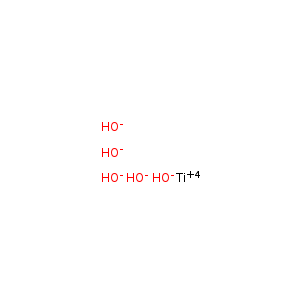

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
Draw.MolToImage(Chem.MolFromSmiles('[OH-].[OH-].[OH-].[OH-].[OH-].[Ti+4]'))